In [64]:
#collect data from finance.google.com OR yahoo finance

In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
dates = []
prices = []

In [7]:

def get_data(filename): #filename will be stock prices csv file
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)        
        for row in csvFileReader:
                dates.append(int(row[0].split('-')[0]))
                prices.append(float(row[1]))
        return
get_data('AAPL.csv')

In [20]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))
    
    svr_lin = SVR(kernel = 'linear', C = 1e3)
    svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 2)
    svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color = 'black', label = 'Data')
    plt.plot(dates, svr_rbf.predict(dates), color = 'red', label = 'RBF_MODEL')
    plt.plot(dates, svr_lin.predict(dates), color = 'green', label = 'LINEAR_MODEL')
    plt.plot(dates, svr_poly.predict(dates), color = 'blue', label = 'PLOY_MODEL')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression') 

    plt.legend()
    plt.show() 

    return svr_rbf.predict(x)
    
#     return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_ploy.predict(x)[0]


In [21]:
print(len(dates))
print(len(prices))
print(dates)
print(prices)

20
20
[18, 17, 13, 12, 11, 10, 9, 6, 5, 4, 18, 17, 13, 12, 11, 10, 9, 6, 5, 4]
[120.0, 118.34, 119.11, 118.9, 118.74, 118.77, 117.95, 116.78, 115.92, 115.85, 120.0, 118.34, 119.11, 118.9, 118.74, 118.77, 117.95, 116.78, 115.92, 115.85]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


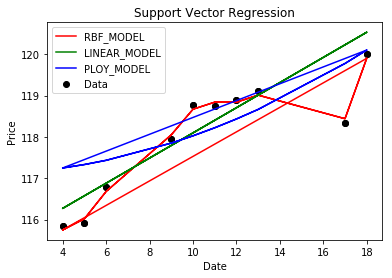

[118.50215243]


In [22]:

pr = np.asarray(30)
predicted_price = predict_prices(dates, prices, pr.reshape(-1,1))
print(predicted_price)